In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bayer/PacakgingLineDataSet.csv', encoding = 'unicode_escape', nrows= 100000, low_memory=False)

In [ ]:
print(df.shape)
df.head()

(100000, 670)


,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-08 20:13:58,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.29,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:13:58
1,2020-06-08 20:13:59,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.17,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:13:59
2,2020-06-08 20:14:00,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.14,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:00
3,2020-06-08 20:14:01,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.18,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:01
4,2020-06-08 20:14:02,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.12,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:02


In [ ]:
selFeat = ['GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V',
 'GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V',
 'GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V',
 'GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu12_V',
 'GRZ_L09_06__Bundler_Application_Mach_HMI_Mach_F_dw_PLC_HMI_ComCheck_V',
 'GRZ_L09_07_Case_Packer_CrtLd_FlapHoMa_op_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_TiAlarm_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvMainSW_fVelCurBlMin_V',
 'GRZ_L09_07_Case_Packer_CrpBkhTp_V',
 'GRZ_L09_08_Palletizer_READY_RU_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_AirPrOk_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvMainSW_fVelCurCycMin_V',
 'GRZ_L09_08_Palletizer_IDB_PalClp_TiAlarm_V',
 'GRZ_L09_07_Case_Packer_CrpBkhBt_V',
 'GRZ_L09_04_Cartoner_SX_V3455_00_RobotLift_VC_MD_3455_A_LiftPosAct_V',
 'GRZ_L09_02_Filler_APP_V0003_00_OpUnits_HMI_VC_MD_003_A_MachineState_V',
 'GRZ_L09_07_Case_Packer_CrtLd_FlapHoDi_op_V',
 'GRZ_L09_06__Bundler_Application_SeaB_HMI_SeaB_V_r_PosAct_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu9_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu14_V',
 'GRZ_L09_08_Palletizer_IDB_PalClp_AirPrOk_V',
 'GRZ_L09_06__Bundler_Application_Mach_HMI_Mach_F_dw_HMI_PLC_ComCheck_V',
 'GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_op_V',
 'GRZ_L09_02_Filler_APP_V2200_00_BoxInfeed_VC_MX_2200_TE_EmptyBoxInfeed_V',
 'GRZ_L09_08_Palletizer_STâ__RUNG_FaultNrFu12_V',
 'GRZ_L09_08_Palletizer_AutoActiv_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tBFSenSplSW_tSen_lCntBat_V',
 'GRZ_L09_08_Palletizer_Auto_V',
 'GRZ_L09_08_Palletizer_STâ__RUNG_FaultNrFu1_V',
 'GRZ_L09_07_Case_Packer_CartonSuportDown_V',
 'GRZ_L09_06__Bundler_Application_Ouf1_HMI_Ouf1_V_r_VelAct_V',
 'GRZ_L09_06__Bundler_Application_Ver_HMI_Ver_V_r_VelAct_V',
 'GRZ_L09_04_Cartoner_SX_V0456_01_RobotTool_VC_MX_456_TE_VacMonitor_V',
 'GRZ_L09_04_Cartoner_SX_V3700_99_UpstreamMach_VC_MX_3700_MW_UpstrNotReady_V',
 'GRZ_L09_04_Cartoner_SX_V0100_00_ProductSensingTubes_IX_100_B2ProdSens_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSenPre_V',
 'GRZ_L09_07_Case_Packer_VacSensSup_V',
 'GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_PosAct_V',
 'GRZ_L09_06__Bundler_Application_Inf_HMI_Inf_V_r_VelAct_V',
 'GRZ_L09_07_Case_Packer_CARTSUP_V',
 'GRZ_L09_06__Bundler_Application_Ouf3_HMI_Ouf3_V_r_VelAct_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wEje_V',
 'GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_w_ProdContTimeAct_V',
 'GRZ_L09_04_Cartoner_SX_V0456_01_RobotTool_IX_456_B5VacLow_V',
 'GRZ_L09_06__Bundler_Application_Inf_HMI_Inf_V_w_CycleTimeAct_V',
 'GRZ_L09_04_Cartoner_SX_V0100_00_ProductSensingApplicator_IX_100_B3ProdSens_V',
 'GRZ_L09_06__Bundler_Application_FiSl_HMI_FiSl_V_r_ActTime_op_V',
 'GRZ_L09_07_Case_Packer_TP27_PROGSTRING_TAKT_MIN_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wEjePre_V',
 'GRZ_L09_06__Bundler_Application_SeaJ_HMI_SeaJ_V_r_ActTime_fr_V',
 'GRZ_L09_02_Filler_APP_V0710_01_CombiCartoner_VC_MS_710_MU_CombiCartoner_iState_V',
 'GRZ_L09_08_Palletizer_VakPump_V',
 'GRZ_L09_08_Palletizer_HMPTAKT_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V',
 'GRZ_L09_08_Palletizer_MESSZEIT_PROD_V',
 'GRZ_L09_08_Palletizer_EmStON_V',
 'GRZ_L09_07_Case_Packer_HMPTAKT_V',
 'GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V',
 'GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V',
 'GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V',
 'GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V',
 'GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V']

In [ ]:
thisDf = df[selFeat]

In [ ]:
thisDf.shape

(100000, 69)

In [ ]:
thisDf['ActivityName'] = df['ActivityName']
thisDf['Category'] = df['Category']
thisDf['ProductionYN'] = df['ProductionYN']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
print(thisDf.shape)
thisDf.head()

(100000, 72)


,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V,ActivityName,Category,ProductionYN
0,2.29,-29.06,0.16,1,677715646,111,0,0,0,30,...,1,0,9807774,0.0,0,0,0,Undefiniert,2 Unplanned downtime,0
1,2.17,-29.06,0.16,1,677715646,111,0,0,0,30,...,1,0,9807774,0.0,0,0,0,Undefiniert,2 Unplanned downtime,0
2,2.14,-29.06,0.16,1,677715646,111,0,0,0,30,...,1,0,9807774,0.0,0,0,0,Undefiniert,2 Unplanned downtime,0
3,2.18,-29.06,0.16,1,677775648,111,0,0,0,30,...,1,0,9807774,0.0,0,0,0,Undefiniert,2 Unplanned downtime,0
4,2.12,-29.06,0.16,1,677775648,111,0,0,0,30,...,1,0,9807774,0.0,0,0,0,Undefiniert,2 Unplanned downtime,0


In [ ]:
print(thisDf['ActivityName'].unique())
print(thisDf['Category'].unique())

['Undefiniert' 'Vorbereiten Anlage (Schichtbeginn)' 'Produktion'
 'Auftragswechsel (Produkt)' 'Kurzer Stillstand'
 'Undefiniert (Grund wählen)']
['2 Unplanned downtime' '1 Planned downtime' '4 Production time'
 '3 Changeovers' '5 Microstop']


In [ ]:
# Frequency Encoding the Categorical Variables
from sklearn.model_selection import train_test_split

train, test = train_test_split(thisDf, test_size=0.25, random_state= 42)
print(train.shape)
print(test.shape)

enc_nom_1 = (train.groupby('ActivityName').size()) / len(train)  

train['ActivityName'] = train['ActivityName'].apply(lambda x : enc_nom_1[x])
test['ActivityName'] = test['ActivityName'].apply(lambda x : enc_nom_1[x])


enc_nom_2 = (train.groupby('Category').size()) / len(train)  

train['Category'] = train['Category'].apply(lambda x : enc_nom_2[x])
test['Category'] = test['Category'].apply(lambda x : enc_nom_2[x])

(75000, 72)
(25000, 72)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

print(train_scaled.shape)

print(test_scaled.shape)

(75000, 72)
(25000, 72)


In [ ]:
train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.433735,0.286588,0.5375,1.0,0.986023,0.036036,1.0,1.0,0.214286,0.034483,...,1.0,0.0,0.980716,1.0,0.000000,0.000000,0.0,1.000000,1.000000,1.0
1,0.289157,0.286588,0.5875,1.0,0.703549,0.036036,1.0,1.0,0.134921,0.034483,...,1.0,0.0,0.790634,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.0
2,0.421687,0.286588,0.8250,1.0,0.096680,0.036036,1.0,1.0,0.000000,0.034483,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.384299,0.384299,0.0
3,0.144578,0.286588,0.4625,1.0,0.759458,0.036036,1.0,1.0,0.277778,0.724138,...,1.0,1.0,0.873278,1.0,0.725806,0.884444,0.0,1.000000,1.000000,1.0
4,0.469880,0.286588,0.2875,1.0,0.953409,0.036036,1.0,1.0,0.039683,0.034483,...,1.0,0.0,0.914601,1.0,0.000000,0.000000,0.0,0.384299,0.384299,0.0


In [ ]:
N = 71
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 71]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 71]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 71)
(25000, 71)
(75000,)
(25000,)


In [ ]:
#Logistic Reg
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

1.0
1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# We find out that the Model simply overfits when we are using ActivityName and Category variables. Same is observed when we are taking either of them
# So we will consider only the relevant PLC Tags  

In [ ]:
thisDf = df[selFeat]

In [ ]:
thisDf.shape

(100000, 69)

In [ ]:

thisDf['ProductionYN'] = df['ProductionYN']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(thisDf.shape)
thisDf.head()

(100000, 70)


,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V,GRZ_L09_08_Palletizer_MESSZEIT_PROD_V,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V,ProductionYN
0,2.29,-29.06,0.16,1,677715646,111,0,0,0,30,...,0,0,1,0,9807774,0.0,0,0,0,0
1,2.17,-29.06,0.16,1,677715646,111,0,0,0,30,...,0,0,1,0,9807774,0.0,0,0,0,0
2,2.14,-29.06,0.16,1,677715646,111,0,0,0,30,...,0,0,1,0,9807774,0.0,0,0,0,0
3,2.18,-29.06,0.16,1,677775648,111,0,0,0,30,...,0,0,1,0,9807774,0.0,0,0,0,0
4,2.12,-29.06,0.16,1,677775648,111,0,0,0,30,...,0,0,1,0,9807774,0.0,0,0,0,0


In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(thisDf, test_size=0.25, random_state= 42)
print(train.shape)
print(test.shape)


(75000, 70)
(25000, 70)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

print(train_scaled.shape)

print(test_scaled.shape)

(75000, 70)
(25000, 70)


In [ ]:
N = 69
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 69]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 69]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 69)
(25000, 69)
(75000,)
(25000,)


In [ ]:
# Now we will try some Supervised Classification Algo with default parameters and check their accuracy, F1 score

In [ ]:
#Logistic Reg
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.94608
0.9465748032915582
0.9463503940141685


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=315)

knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.94656
0.9472524725889795
0.9464185449586909


In [ ]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99736
0.9973952614728796
0.9974224791064593


In [ ]:

# Random Forest 
## 
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.9984
0.9984174459651181
0.9984389634717453


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.97432
0.9746628110765833
0.9746164795192156


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.97232
0.972538145939813
0.9727687706595309


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.94784
0.9482023405912119
0.9483687044662654


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)



print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.90452
0.9042010513954357
0.9078058012436754


In [ ]:
# So we see that Random Forest with default Parameters is giving best accuracy and F2 score. 
#So now lets perform Some Sampling Strategies and Tune some of its hyperparameters using Grid Search CV

In [ ]:

# Random Forest 
## 
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99836
0.9983743359356745
0.998400124868303


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.9984
0.9984133344537309
0.9984392071172155


In [ ]:
from imblearn.under_sampling import TomekLinks 

tl = TomekLinks()

X_res, y_res = tl.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99812
0.9981506236058046
0.9981648510405684


In [ ]:
from imblearn.combine import SMOTETomek 

smteok = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

X_res, y_res = smteok.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99836
0.9983620014015131
0.9984008736690199


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define Parameters
max_depth=[ 7, 9]
n_estimators = [300, 600]
min_samples_split = [2, 7]
min_samples_leaf = [2, 5]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=random_grid, cv = 2)
grid_results = grid.fit(X_train, y_train)


In [ ]:
best_clf = grid_results.best_estimator_

best_clf

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=300)

In [ ]:
y_pred = best_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.9782
0.9786985252783565
0.9783239867955296


In [ ]:
# We find that SMOTE Sampling is giving better results with default parameters 
# Next we will find next subset of Data and Use Random Forest with SMOTE sampling

In [ ]:
df.iloc[[0, -1]]

,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-08 20:13:58,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.29,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:13:58
99999,2020-06-10 00:50:27,Produktion,4 Production time,1,60,0,2955,0,2.07,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:27


In [ ]:
df2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bayer/PacakgingLineDataSet.csv', encoding = 'unicode_escape', nrows= 100000, skiprows=[i for i in range(1,100001)], low_memory=False)

In [ ]:
df2.iloc[[0, -1]]

,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-10 00:50:28,Produktion,4 Production time,1,60,0,2955,0,2.06,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:28
99999,2020-06-11 08:48:43,Undefiniert (Grund wählen),2 Unplanned downtime,0,104,0,2981,0,2.23,0,...,0,0,0,0,0,0,1,1,0,2020-06-11 08:48:43


In [ ]:
print(df2.shape)
df2.head()

(100000, 670)


,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-10 00:50:28,Produktion,4 Production time,1,60,0,2955,0,2.06,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:28
1,2020-06-10 00:50:29,Produktion,4 Production time,1,60,0,2955,0,2.04,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:29
2,2020-06-10 00:50:30,Produktion,4 Production time,1,60,0,2955,0,2.16,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:30
3,2020-06-10 00:50:31,Produktion,4 Production time,1,60,0,2955,0,2.22,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:31
4,2020-06-10 00:50:32,Produktion,4 Production time,1,60,0,2955,0,2.09,0,...,0,0,0,0,0,0,1,1,0,2020-06-10 00:50:32


In [ ]:
thisDf = df2[selFeat]

In [ ]:
thisDf.shape

(100000, 69)

In [ ]:

thisDf['ProductionYN'] = df2['ProductionYN']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(thisDf.shape)
thisDf.head()

(100000, 70)


,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V,GRZ_L09_08_Palletizer_MESSZEIT_PROD_V,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V,ProductionYN
0,2.06,-15.0,0.04,4,780730870,4,1,1,34,25,...,65535,49500,1,1,9943899,20.0,45,77000,0,1
1,2.04,-15.0,0.04,4,780730870,4,1,1,34,2,...,65535,49500,1,1,9943899,20.0,45,77000,0,1
2,2.16,-9.5,0.04,4,780730870,4,1,1,34,2,...,65535,58200,1,1,9943899,20.0,45,77000,0,1
3,2.22,-15.0,0.04,4,780730870,4,1,1,34,2,...,65535,58200,1,1,9943899,20.0,45,85800,0,1
4,2.09,-15.0,0.04,4,780730870,4,1,1,34,2,...,65535,58200,1,1,9943899,20.0,45,85800,0,1


In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(thisDf, test_size=0.25, random_state= 42)
print(train.shape)
print(test.shape)


(75000, 70)
(25000, 70)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

print(train_scaled.shape)

print(test_scaled.shape)

(75000, 70)
(25000, 70)


In [ ]:
N = 69
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 69]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 69]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 69)
(25000, 69)
(75000,)
(25000,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99868
0.9985171478910893
0.9978906999041228


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


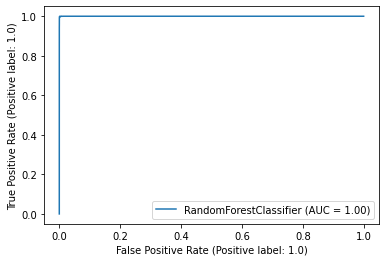

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
df3 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bayer/PacakgingLineDataSet.csv', encoding = 'unicode_escape', nrows= 100000, skiprows=[i for i in range(1,500001)], low_memory=False)

In [ ]:
df3.iloc[[0, -1]]

,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-14 20:10:10,Undefiniert (Grund wählen),2 Unplanned downtime,0,104,0,2981,0,2.29,0,...,0,0,0,0,0,0,1,1,0,2020-06-14 20:10:10
99999,2020-06-16 00:39:34,Undefiniert,2 Unplanned downtime,0,840,0,3004,0,2.16,0,...,0,0,0,0,1,0,1,1,0,2020-06-16 00:39:34


In [ ]:
print(df3.shape)
df3.head(2)

(100000, 670)


,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-14 20:10:10,Undefiniert (Grund wählen),2 Unplanned downtime,0,104,0,2981,0,2.29,0,...,0,0,0,0,0,0,1,1,0,2020-06-14 20:10:10
1,2020-06-14 20:10:11,Undefiniert (Grund wählen),2 Unplanned downtime,0,104,0,2981,0,2.18,0,...,0,0,0,0,0,0,1,1,0,2020-06-14 20:10:11


In [ ]:
thisDf = df3[selFeat]
print(thisDf.shape)

(100000, 69)


In [ ]:

thisDf['ProductionYN'] = df3['ProductionYN']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
thisDf['ProductionYN'].unique()

array([0, 1])

In [ ]:
print(thisDf.shape)
thisDf.head()

(100000, 70)


,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V,GRZ_L09_08_Palletizer_MESSZEIT_PROD_V,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V,ProductionYN
0,2.29,-15.0,0.0,1,195924266,111,0,0,0,30,...,0,0,0,0,10041399,0.0,0,0,1,0
1,2.18,-15.0,0.0,1,195924266,111,0,0,0,30,...,0,0,0,0,10041399,0.0,0,0,1,0
2,2.14,-15.0,0.0,1,195924266,111,0,0,0,30,...,0,0,0,0,10041399,0.0,0,0,1,0
3,2.19,-15.0,0.0,1,195924266,111,0,0,0,30,...,0,0,0,0,10041399,0.0,0,0,1,0
4,2.22,-15.0,0.0,1,195924266,111,0,0,0,30,...,0,0,0,0,10041399,0.0,0,0,1,0


In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(thisDf, test_size=0.25, random_state= 42)
print(train.shape)
print(test.shape)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

print(train_scaled.shape)

print(test_scaled.shape)

N = 69
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 69]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 69]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(75000, 70)
(25000, 70)
(75000, 70)
(25000, 70)
(75000, 69)
(25000, 69)
(75000,)
(25000,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.99876
0.9985965458989678
0.9983755174762878


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


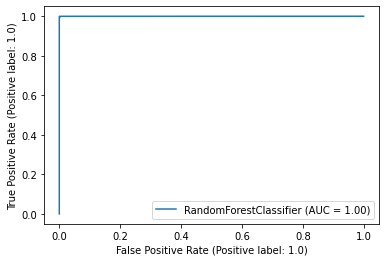

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
df4 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Bayer/PacakgingLineDataSet.csv', encoding = 'unicode_escape',  skiprows=[i for i in range(1,600001)], low_memory=False)

In [ ]:
df4.iloc[[0, -1]]

,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-16 00:39:35,Undefiniert,2 Unplanned downtime,0,840,0,3004,0,2.16,0,...,0,0,0,0,1,0,1,1,0,2020-06-16 00:39:35
161536,2020-06-17 23:59:59,Undefiniert,2 Unplanned downtime,0,4132,0,3078,0,2.23,0,...,0,0,0,0,0,0,1,1,0,2020-06-17 23:59:59


In [ ]:
print(df4.shape)
df4.head(2)

(161537, 670)


,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-16 00:39:35,Undefiniert,2 Unplanned downtime,0,840,0,3004,0,2.16,0,...,0,0,0,0,1,0,1,1,0,2020-06-16 00:39:35
1,2020-06-16 00:39:36,Undefiniert,2 Unplanned downtime,0,840,0,3004,0,2.20,0,...,0,0,0,0,1,0,1,1,0,2020-06-16 00:39:36


In [ ]:
thisDf = df4[selFeat]
print(thisDf.shape)

(161537, 69)


In [ ]:

thisDf['ProductionYN'] = df4['ProductionYN']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
thisDf['ProductionYN'].unique()

array([0, 1])

In [ ]:
print(thisDf.shape)
thisDf.head()

(161537, 70)


,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V,GRZ_L09_08_Palletizer_MESSZEIT_PROD_V,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V,ProductionYN
0,2.16,-29.06,0.18,1,305142403,111,0,0,0,29,...,0,0,1,0,10165524,0.0,0,0,1,0
1,2.20,-29.06,0.18,1,305142403,111,0,0,0,29,...,0,0,1,0,10165524,0.0,0,0,1,0
2,2.23,-29.06,0.18,1,305142403,111,0,0,0,29,...,0,0,1,0,10165524,0.0,0,0,1,0
3,2.22,-29.06,0.18,1,305142403,111,0,0,0,29,...,0,0,1,0,10165524,0.0,0,0,1,0
4,2.15,-29.06,0.18,1,305142403,111,0,0,0,29,...,0,0,1,0,10165524,0.0,0,0,1,0


In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(thisDf, test_size=0.25, random_state= 42)
print(train.shape)
print(test.shape)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

print(train_scaled.shape)

print(test_scaled.shape)

N = 69
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 69]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 69]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(121152, 70)
(40385, 70)
(121152, 70)
(40385, 70)
(121152, 69)
(40385, 69)
(121152,)
(40385,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.9969047913829392
0.9968068303822194
0.9972661461408918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


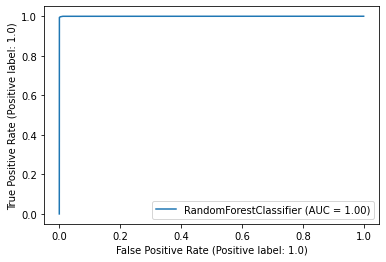

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
#######################################################

In [ ]:
from statistics import mean
def Average(l): 
    avg = mean(l) 
    return avg
  
acc_list = [0.9984, 0.99868, 0.99876, 0.9969047913829392] 
acc_average = Average(acc_list) 

rocauc_list = [0.9984133344537309, 0.9985171478910893, 0.9985965458989678, 0.9968068303822194] 
rocauc_average = Average(rocauc_list) 

f1_list = [0.9984392071172155, 0.9978906999041228, 0.9983755174762878, 0.9972661461408918] 
f1_average = Average(f1_list) 

print(acc_average)
print(rocauc_average)
print(f1_average)

0.9981861978457348
0.9980834646565019
0.9979928926596295


In [ ]:
#featSelected = [ 4,   9, 100, 102, 106, 109, 114, 123, 133, 137, 138, 139, 150,
            151, 159, 165, 167, 171, 176, 186, 190, 193, 196, 199, 205, 207,
            209, 213, 222, 223, 224, 232, 237, 241, 243, 257, 271, 275, 290,
            296, 297, 299, 304, 321, 349, 352, 369, 371, 374, 376, 379, 410,
            417, 429, 444, 449, 452, 462, 484, 488, 491, 502, 504, 507, 508,
            522, 526, 528, 640]